In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Dataset can be found on:
https://www.kaggle.com/datasets/andrewmvd/udemy-courses

In [2]:
url = 'https://raw.githubusercontent.com/futagoya/4-data-analysis-udemy-courses/main/udemy_courses.csv'
data = pd.read_csv(url,parse_dates=['published_timestamp'])

# 1. Show top rows of the Dataset

In [3]:
data.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [4]:
data.shape

(3678, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

# 2. Show null data on Dataset

<Axes: >

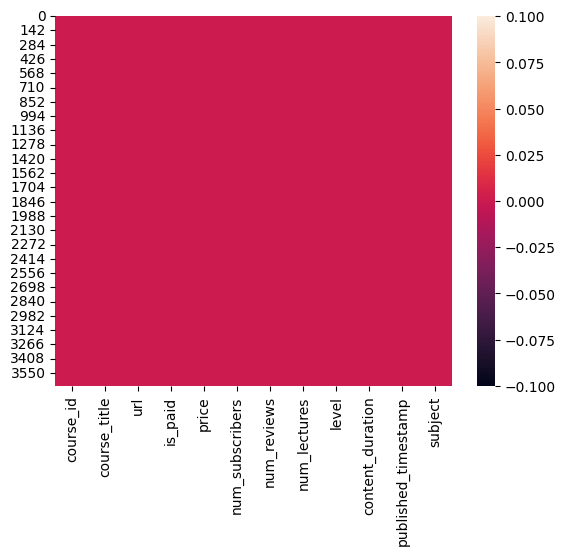

In [6]:
sns.heatmap(data.isnull())

# 3. Drop the duplicate data

In [7]:
dup=data.duplicated().any()
dup

True

In [8]:
data=data.drop_duplicates()
dup=data.duplicated().any()
dup

False

In [9]:
data['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

# 4. Show number courses per subjects

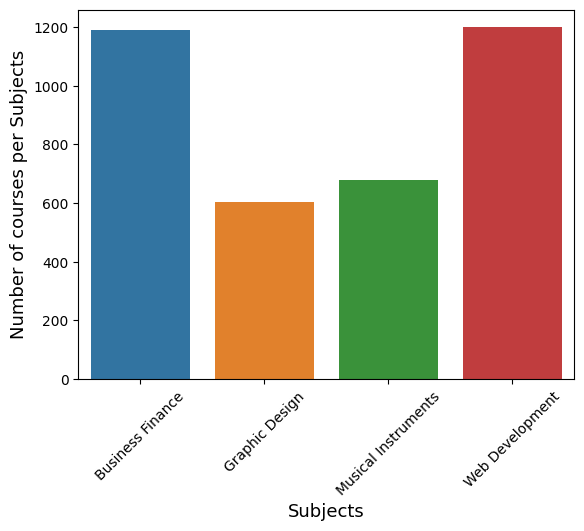

In [10]:
sns.countplot(x=data['subject'])
plt.xlabel('Subjects',fontsize=13)
plt.ylabel('Number of courses per Subjects',fontsize=13)
plt.xticks(rotation=45)
plt.show()

# 5. Show the number of subscribers of paid & free courses

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

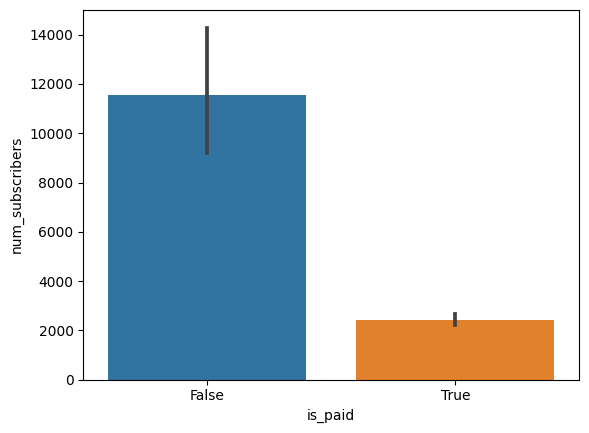

In [11]:
sns.barplot(x='is_paid',y='num_subscribers',data=data)

# 6. Show the number of subscribers of Levels

<Axes: xlabel='level', ylabel='num_subscribers'>

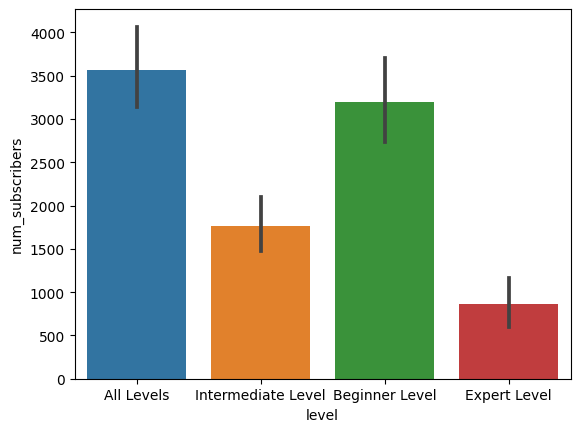

In [12]:
sns.barplot(x='level',y='num_subscribers',data=data)

In [13]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

# 7. Show top 10 course titles based on number of subscribers

In [14]:
data[data['num_subscribers'].max()==data['num_subscribers']]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


In [15]:
top_10=data.sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

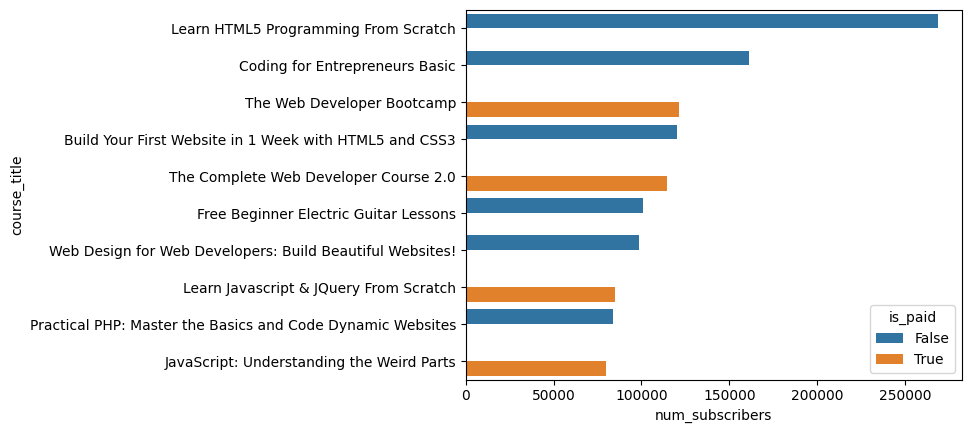

In [16]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10,hue='is_paid')

# 8. Show num of reviews based on Subjects

<Axes: xlabel='subject', ylabel='num_reviews'>

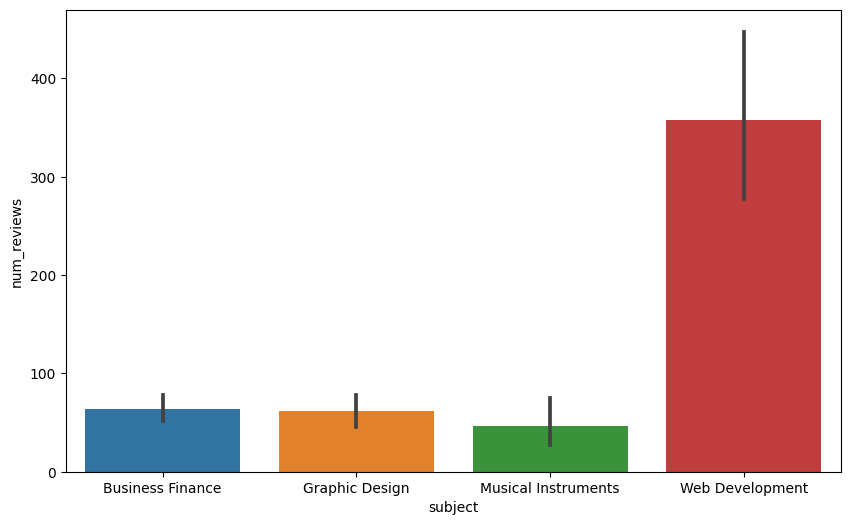

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='subject',y='num_reviews',data=data)

# 9. Plotting price vs number of reviews (& number of subscribers)

<Axes: xlabel='price', ylabel='num_reviews'>

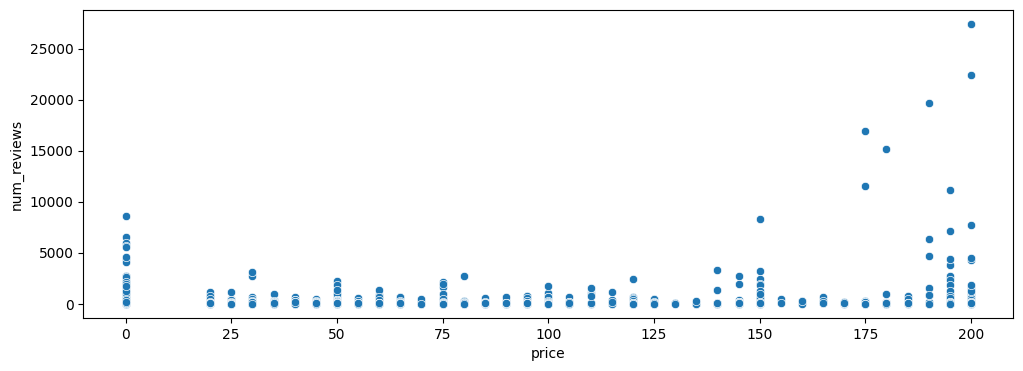

In [18]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='price',y='num_reviews',data=data)

<Axes: xlabel='price', ylabel='num_subscribers'>

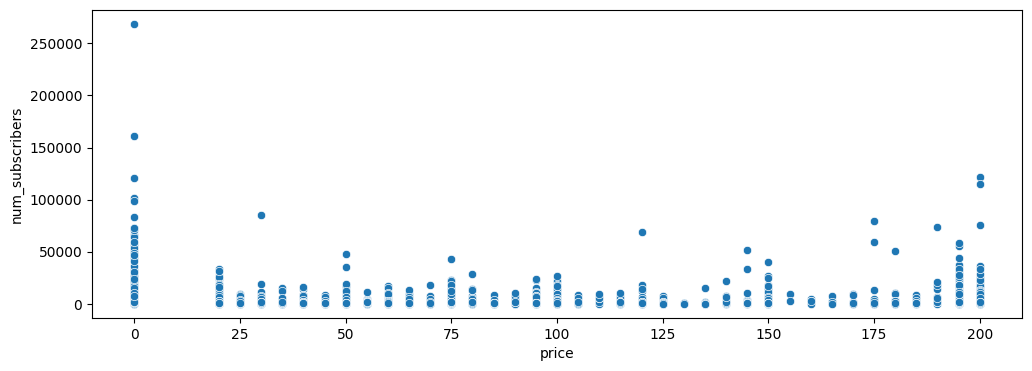

In [19]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='price',y='num_subscribers',data=data)

# 10. Top 5 python courses

In [20]:
len(data[data['course_title'].str.contains('python',case=False)])

29

In [21]:
python=data[data['course_title'].str.contains('python',case=False)]. \
sort_values('num_subscribers',ascending=False).head(5)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

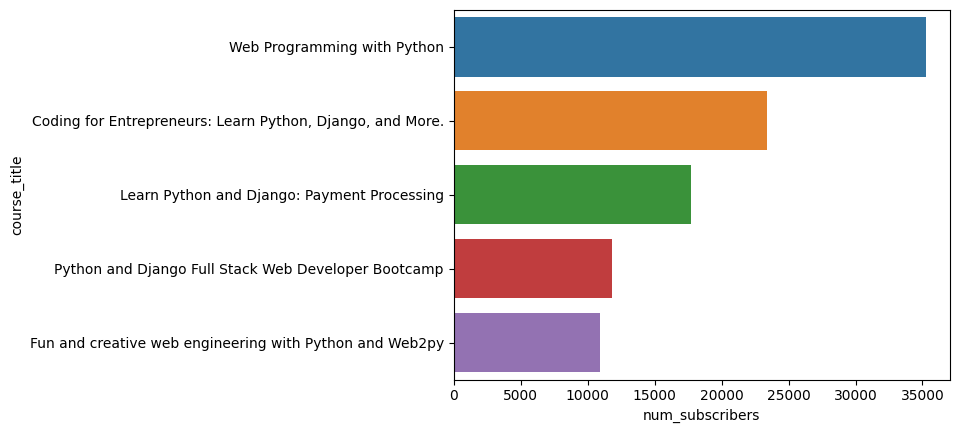

In [22]:
sns.barplot(x='num_subscribers',y='course_title',data=python)

In [23]:
data['Year']=data['published_timestamp'].dt.year

In [24]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


# 11. Subjects uploaded yearly

<Axes: xlabel='Year', ylabel='count'>

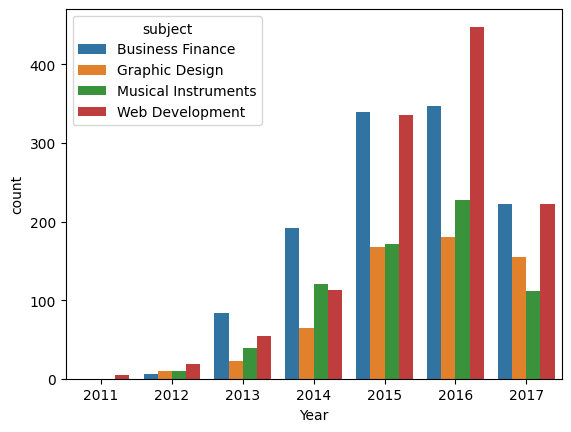

In [25]:
sns.countplot(x='Year',data=data,hue='subject')

In [26]:
data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64